<a href="https://colab.research.google.com/github/moreiradaltran/case-spotify-rolling-stones/blob/main/case_spotify.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Case - Spotify

## Problema a ser resolvido: Entender as características e comportamentos que as músicas dos artistas/bandas Top Artists causam em seus usuários. O caso que decidi analisar é a famosa banda de rock Rolling Stones.

### As colunas neste conjunto de dados são:

- Nome - O nome da música.

- Álbum - O nome do álbum.

- Release_date - O dia, mês e ano em que o álbum foi lançado.

- Número da faixa -  A ordem em que a música aparece no álbum

- id - O id do Spotify para a música.

- uri - O uri do Spotify para a música.

- Acústica - Uma medida de confiança de 0,0 a 1,0 se a faixa é acústica. 1.0 representa alta confiança de que a faixa é acústica.

- Danceability - Danceability descreve o quanto uma faixa é adequada para dançar com base em uma combinação de elementos musicais, incluindo andamento, estabilidade do ritmo, força da batida e regularidade geral. Um valor de 0,0 é menos dançável e 1,0 é o mais dançável.

- Energia - A energia é uma medida de 0,0 a 1,0 e representa uma medida perceptiva de intensidade e atividade. Normalmente, as faixas energéticas parecem rápidas, altas e barulhentas. Por exemplo, death metal tem alta energia, enquanto um prelúdio de Bach pontua baixo na escala. Os recursos perceptivos que contribuem para esse atributo incluem faixa dinâmica, sonoridade percebida, timbre, taxa de início e entropia geral.

- Instrumentalness - Prevê se uma faixa não contém vocais. Os sons "Ooh" e "aah" são tratados como instrumentais neste contexto. Faixas de rap ou palavras faladas são claramente "vocais". Quanto mais próximo o valor da instrumentalidade estiver de 1,0, maior a probabilidade de a faixa não conter nenhum conteúdo vocal. Valores acima de 0,5 destinam-se a representar faixas instrumentais, mas a confiança é maior conforme o valor se aproxima de 1,0.

- Vivacidade - Detecta a presença de uma audiência na gravação. Valores mais altos de vivacidade representam uma probabilidade maior de que a faixa tenha sido tocada ao vivo. Um valor acima de 0,8 fornece uma forte probabilidade de que a faixa esteja ativa.

- Loudness - O volume geral de uma faixa em decibéis (dB). Os valores de volume são calculados em média em toda a faixa e são úteis para comparar o volume relativo das faixas. Loudness é a qualidade de um som que é o principal correlato psicológico da força física (amplitude).
Os valores geralmente variam entre -60 e 0 db.

- Locução - detecta a presença de palavras faladas em uma faixa. Quanto mais exclusivamente semelhante à fala for a gravação (por exemplo, talk show, livro de áudio, poesia), mais próximo de 1,0 será o valor do atributo. Valores acima de 0,66 descrevem faixas que provavelmente são feitas inteiramente de palavras faladas. Valores entre 0,33 e 0,66 descrevem faixas que podem conter música e fala, seja em seções ou em camadas, incluindo casos como rap. Valores abaixo de 0,33 provavelmente representam música e outras faixas não semelhantes à fala.

- Tempo - O tempo geral estimado de uma faixa em batidas por minuto (BPM). Na terminologia musical, tempo é a velocidade ou ritmo de uma determinada peça e deriva diretamente da duração média da batida.

- Valência- Uma medida de 0,0 a 1,0 que descreve a positividade musical transmitida por uma faixa. Faixas com alta valência soam mais positivas (por exemplo, alegres, alegres, eufóricas), enquanto faixas com baixa valência soam mais negativas (por exemplo, tristes, deprimidas, zangadas).

- Popularidade - a popularidade da música de 0 a 100

- duration_ms - A duração da faixa em milissegundos.

- duration_min - A duração da faixa em  minutos.


Importação das bibliotecas utilizadas no projeto:

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import shapiro, mannwhitneyu

Carregamento e visualização do conjunto de dados:




In [ ]:
df = pd.read_excel('dataset_rolling_stones.xlsx')

In [ ]:
df.head()

,name,album,release_date,track_number,acousticness,danceability,energy,instrumentalness,liveness,loudness,speechiness,tempo,valence,popularity,duration_ms
0,Concert Intro Music - Live,Licked Live In NYC,2022-06-10,1,0.0824,0.463,0.993,0.996000,0.932,-12913.0,0.1100,118001.0,0.0302,33,48640
1,Street Fighting Man - Live,Licked Live In NYC,2022-06-10,2,0.4370,0.326,0.965,0.233000,0.961,-4803.0,0.0759,131455.0,0.3180,34,253173
2,Start Me Up - Live,Licked Live In NYC,2022-06-10,3,0.4160,0.386,0.969,0.400000,0.956,-4936.0,0.1150,130066.0,0.3130,34,263160
3,If You Can't Rock Me - Live,Licked Live In NYC,2022-06-10,4,0.5670,0.369,0.985,0.000107,0.895,-5535.0,0.1930,132994.0,0.1470,32,305880
4,Don’t Stop - Live,Licked Live In NYC,2022-06-10,5,0.4000,0.303,0.969,0.055900,0.966,-5098.0,0.0930,130533.0,0.2060,32,305106


Verificação dos tipos de variáveis no conjunto de dados:

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1610 entries, 0 to 1609
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   name              1610 non-null   object        
 1   album             1610 non-null   object        
 2   release_date      1610 non-null   datetime64[ns]
 3   track_number      1610 non-null   int64         
 4   acousticness      1610 non-null   float64       
 5   danceability      1610 non-null   float64       
 6   energy            1610 non-null   float64       
 7   instrumentalness  1610 non-null   float64       
 8   liveness          1610 non-null   float64       
 9   loudness          1610 non-null   float64       
 10  speechiness       1610 non-null   float64       
 11  tempo             1610 non-null   float64       
 12  valence           1610 non-null   float64       
 13  popularity        1610 non-null   int64         
 14  duration_ms       1610 n

Verificação de dados nulos:

In [ ]:
df.isnull().sum()

,0
name,0
album,0
release_date,0
track_number,0
acousticness,0
danceability,0
energy,0
instrumentalness,0
liveness,0
loudness,0


Verificação de dados duplicados:

In [ ]:
df.duplicated().sum()

np.int64(6)

In [ ]:
df[df.duplicated()]

,name,album,release_date,track_number,acousticness,danceability,energy,instrumentalness,liveness,loudness,speechiness,tempo,valence,popularity,duration_ms
928,Some Girls - Remastered,Some Girls (Deluxe Version),1978-06-09,4,0.5270,0.474,0.938,0.520000,0.299,-2643.0,0.0898,71995.00,0.505,21,276933
929,Lies - Remastered,Some Girls (Deluxe Version),1978-06-09,5,0.4370,0.382,0.997,0.950000,0.617,-1568.0,0.1880,162428.00,0.563,16,191266
935,Claudine,Some Girls (Deluxe Version),1978-06-09,1,0.0144,0.439,0.977,0.022100,0.383,-4386.0,0.1280,105124.00,0.364,17,222253
939,No Spare Parts,Some Girls (Deluxe Version),1978-06-09,5,0.2400,0.594,0.762,0.000015,0.712,-5145.0,0.0292,72648.00,0.540,19,270466
940,Don't Be A Stranger,Some Girls (Deluxe Version),1978-06-09,6,0.0610,0.720,0.867,0.029700,0.385,-5871.0,0.0390,127329.00,0.847,15,246266
946,Petrol Blues,Some Girls (Deluxe Version),1978-06-09,12,0.7690,0.835,0.621,0.114000,0.116,-8007.0,0.0406,115.87,0.336,13,95626


Nesse caso, não houve a exclusão dos dados pois são músicas diferentes no mesmo álbumn com a mesma data de lançamento.

Entendimento acerca do primeiro e último lançamento da banda Rolling Stones:

In [ ]:
print('Data de início:', df['release_date'].min())
print('Data do último lançamento: ', df['release_date'].max())

Data de início: 1964-04-16 00:00:00
Data do último lançamento:  2022-06-10 00:00:00


Análise descritiva básica:

In [ ]:
df.describe()

,release_date,track_number,acousticness,danceability,energy,instrumentalness,liveness,loudness,speechiness,tempo,valence,popularity,duration_ms
count,1610,1610.000000,1610.000000,1610.000000,1610.000000,1610.000000,1610.00000,1610.000000,1610.000000,1610.000000,1610.000000,1610.000000,1610.000000
mean,1992-04-23 12:57:14.534161536,8.613665,0.250475,0.468860,0.792352,0.164170,0.49173,-6406.640075,0.069512,114078.725261,0.582165,20.788199,257736.488199
min,1964-04-16 00:00:00,1.000000,0.000009,0.104000,0.141000,0.000000,0.02190,-24408.000000,0.023200,65.990000,0.000000,0.000000,21000.000000
25%,1970-09-04 00:00:00,4.000000,0.058350,0.362250,0.674000,0.000219,0.15300,-8829.500000,0.036500,98996.500000,0.404250,13.000000,190613.000000
50%,1986-03-24 00:00:00,7.000000,0.183000,0.458000,0.848500,0.013750,0.37950,-6179.000000,0.051200,120319.000000,0.583000,20.000000,243093.000000
75%,2017-12-01 00:00:00,11.000000,0.403750,0.578000,0.945000,0.179000,0.89375,-4254.750000,0.086600,140853.750000,0.778000,27.000000,295319.750000
max,2022-06-10 00:00:00,47.000000,0.994000,0.887000,0.999000,0.996000,0.99800,-2.310000,0.624000,216304.000000,0.974000,80.000000,981866.000000
std,NaN,6.560220,0.227397,0.141775,0.179886,0.276249,0.34910,3474.285941,0.051631,46196.602233,0.231253,12.426859,108333.474920


Criação da coluna 'duration_min' para visualização do tempo das faixas em minutos.

In [ ]:
df['duration_min'] = df['duration_ms'] / 60000

In [ ]:
df.head(5)

,name,album,release_date,track_number,acousticness,danceability,energy,instrumentalness,liveness,loudness,speechiness,tempo,valence,popularity,duration_ms,duration_min
0,Concert Intro Music - Live,Licked Live In NYC,2022-06-10,1,0.0824,0.463,0.993,0.996000,0.932,-12913.0,0.1100,118001.0,0.0302,33,48640,0.810667
1,Street Fighting Man - Live,Licked Live In NYC,2022-06-10,2,0.4370,0.326,0.965,0.233000,0.961,-4803.0,0.0759,131455.0,0.3180,34,253173,4.219550
2,Start Me Up - Live,Licked Live In NYC,2022-06-10,3,0.4160,0.386,0.969,0.400000,0.956,-4936.0,0.1150,130066.0,0.3130,34,263160,4.386000
3,If You Can't Rock Me - Live,Licked Live In NYC,2022-06-10,4,0.5670,0.369,0.985,0.000107,0.895,-5535.0,0.1930,132994.0,0.1470,32,305880,5.098000
4,Don’t Stop - Live,Licked Live In NYC,2022-06-10,5,0.4000,0.303,0.969,0.055900,0.966,-5098.0,0.0930,130533.0,0.2060,32,305106,5.085100


In [ ]:
df.describe()

,release_date,track_number,acousticness,danceability,energy,instrumentalness,liveness,loudness,speechiness,tempo,valence,popularity,duration_ms,duration_min
count,1610,1610.000000,1610.000000,1610.000000,1610.000000,1610.000000,1610.00000,1610.000000,1610.000000,1610.000000,1610.000000,1610.000000,1610.000000,1610.000000
mean,1992-04-23 12:57:14.534161536,8.613665,0.250475,0.468860,0.792352,0.164170,0.49173,-6406.640075,0.069512,114078.725261,0.582165,20.788199,257736.488199,4.295608
min,1964-04-16 00:00:00,1.000000,0.000009,0.104000,0.141000,0.000000,0.02190,-24408.000000,0.023200,65.990000,0.000000,0.000000,21000.000000,0.350000
25%,1970-09-04 00:00:00,4.000000,0.058350,0.362250,0.674000,0.000219,0.15300,-8829.500000,0.036500,98996.500000,0.404250,13.000000,190613.000000,3.176883
50%,1986-03-24 00:00:00,7.000000,0.183000,0.458000,0.848500,0.013750,0.37950,-6179.000000,0.051200,120319.000000,0.583000,20.000000,243093.000000,4.051550
75%,2017-12-01 00:00:00,11.000000,0.403750,0.578000,0.945000,0.179000,0.89375,-4254.750000,0.086600,140853.750000,0.778000,27.000000,295319.750000,4.921996
max,2022-06-10 00:00:00,47.000000,0.994000,0.887000,0.999000,0.996000,0.99800,-2.310000,0.624000,216304.000000,0.974000,80.000000,981866.000000,16.364433
std,NaN,6.560220,0.227397,0.141775,0.179886,0.276249,0.34910,3474.285941,0.051631,46196.602233,0.231253,12.426859,108333.474920,1.805558


Criação do dataframe com a média de duração das faixas por álbum.

In [ ]:
df.groupby('album')['duration_min'].mean().head()

,duration_min
album,
12 X 5,2.682068
12 x 5,2.682772
A Bigger Bang (2009 Re-Mastered),4.016356
A Bigger Bang (Live),5.176630
Aftermath,3.899185


In [ ]:
df.head()

,name,album,release_date,track_number,acousticness,danceability,energy,instrumentalness,liveness,loudness,speechiness,tempo,valence,popularity,duration_ms,duration_min
0,Concert Intro Music - Live,Licked Live In NYC,2022-06-10,1,0.0824,0.463,0.993,0.996000,0.932,-12913.0,0.1100,118001.0,0.0302,33,48640,0.810667
1,Street Fighting Man - Live,Licked Live In NYC,2022-06-10,2,0.4370,0.326,0.965,0.233000,0.961,-4803.0,0.0759,131455.0,0.3180,34,253173,4.219550
2,Start Me Up - Live,Licked Live In NYC,2022-06-10,3,0.4160,0.386,0.969,0.400000,0.956,-4936.0,0.1150,130066.0,0.3130,34,263160,4.386000
3,If You Can't Rock Me - Live,Licked Live In NYC,2022-06-10,4,0.5670,0.369,0.985,0.000107,0.895,-5535.0,0.1930,132994.0,0.1470,32,305880,5.098000
4,Don’t Stop - Live,Licked Live In NYC,2022-06-10,5,0.4000,0.303,0.969,0.055900,0.966,-5098.0,0.0930,130533.0,0.2060,32,305106,5.085100


Verificação do álbum com maior 'Danceability':

In [67]:
df_album_danceability	 = df.groupby('album')['danceability']
album_most_danceable = df_album_danceability.mean().sort_values(ascending=False).index[0]
print(f'O álbum com maior danceability é: {album_most_danceable}')

O álbum com maior danceability é: England’s Newest Hitmakers


Dataframe e visualização: 'Top 5 álbuns com maior duração média de músicas'

In [ ]:
df_duration_music = df.groupby('album')['duration_min'].mean().sort_values(ascending=False)

<function matplotlib.pyplot.show(close=None, block=None)>

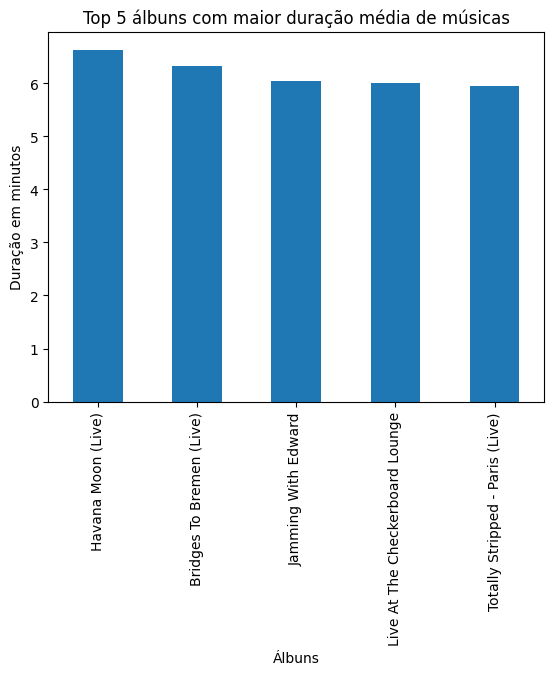

In [ ]:
df_duration_music.head().plot(kind='bar')
plt.xlabel('Álbuns')
plt.ylabel('Duração em minutos')
plt.title('Top 5 álbuns com maior duração média de músicas')
plt.show

Dataframe e visualização: 'Top 10 músicas mais populares'

In [ ]:
df_popularity = df.groupby('name')['popularity'].mean().sort_values(ascending=False)

/tmp/ipython-input-2084627413.py:6: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all Axes decorations.
  plt.tight_layout()


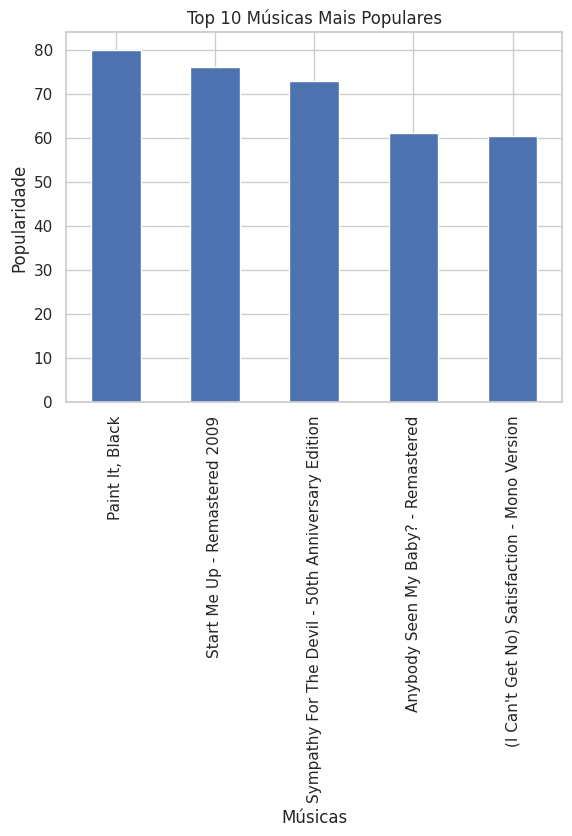

In [ ]:
df_popularity.head(5).plot(kind='bar')
plt.xlabel('Músicas')
plt.ylabel('Popularidade')
plt.title('Top 10 Músicas Mais Populares')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

Dataframe e visualização: 'Top 10 álbuns com mais músicas'

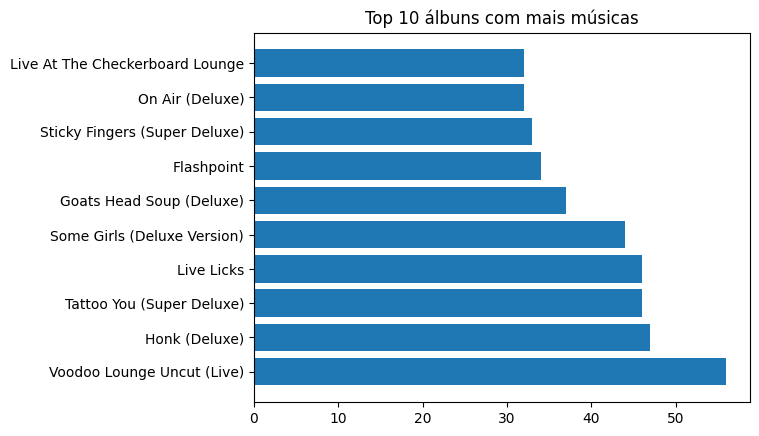

In [ ]:
top_albuns = df['album'].value_counts(ascending=False).head(10)
plt.barh(top_albuns.index, top_albuns.values)
plt.title('Top 10 álbuns com mais músicas')
plt.show()

Visualização da 'Porcentagem de popularidade de álbum na última década (Top 10 álbuns)'

In [ ]:
df_last_decade = df[df['release_date'].between(pd.to_datetime('2011'), pd.to_datetime('2020'))]

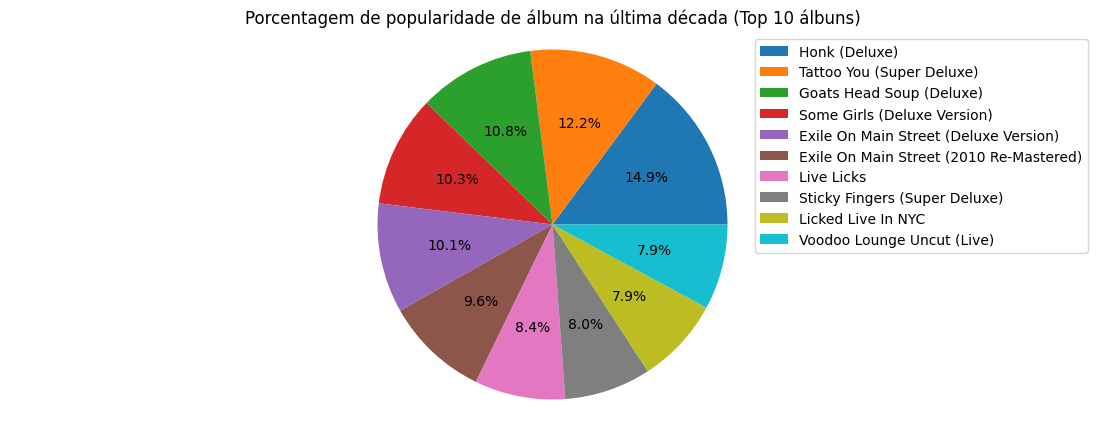

In [ ]:
df_per_album = df.groupby('album')['popularity'].sum().sort_values(ascending=False).head(10)
total_popularity = df_per_album.sum()
df_percentage = df_per_album / total_popularity * 100
labels = df_percentage.index.tolist()
sizes = df_percentage.values.tolist()
figure, graphic = plt.subplots(figsize=(14, 5))
graphic.pie(sizes, autopct='%1.1f%%')
graphic.axis('equal')
plt.title('Porcentagem de popularidade de álbum na última década (Top 10 álbuns)')
plt.legend(labels, loc='best')
plt.show()

Identificação de outliers com o gráfico boxplot.

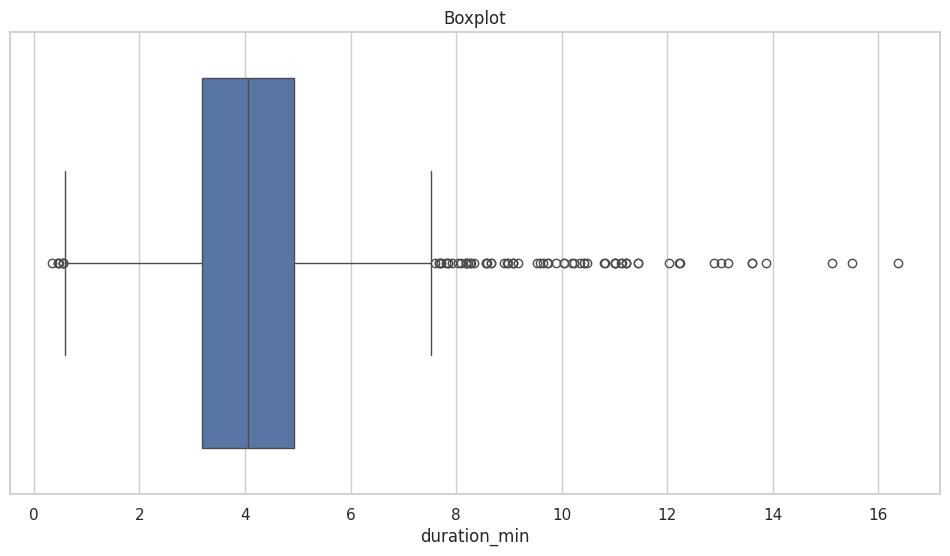

In [ ]:
sns.set (style='whitegrid')
fig, axes = plt.subplots(figsize=(12,6))
sns.boxplot(x='duration_min', data=df)
axes.set_title('Boxplot')
plt.show()

identificação de outliers com o gráfico violino.

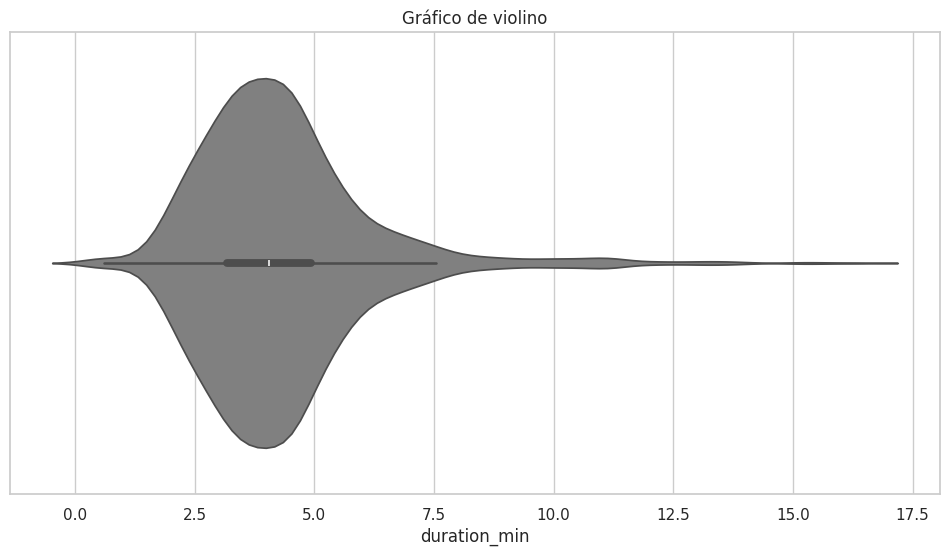

In [ ]:
fig, axes = plt.subplots(figsize=(12,6))
sns.violinplot(x='duration_min', data=df, color="gray")
axes.set_title ('Gráfico de violino')
plt.show()

Mescla dos dois tipos de gráficos para entender nossos valores discrepantes:

Text(0.5, 1.0, 'Gráficos Violino e Boxplot')

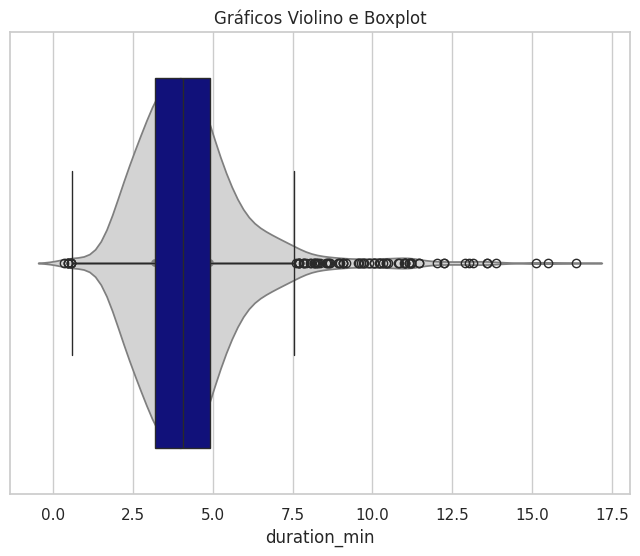

In [ ]:
fig, ax = plt.subplots(figsize=(8,6))

sns.violinplot(x='duration_min', data=df, ax=ax, color="lightgray")
sns.boxplot(x='duration_min', data=df, ax=ax, whis=1.5, color='darkblue')

ax.set_title('Gráficos Violino e Boxplot')

indicador se a música é ao vivo ou não:

In [ ]:
def live_music_classification (df):
  if df['liveness'] >= 0.8:
    return True
  else:
    return False

In [ ]:
df['live_music_classification'] = df.apply(live_music_classification, axis=1)

In [ ]:
df.groupby('live_music_classification')['live_music_classification'].count()

,live_music_classification
live_music_classification,
False,1112
True,498


In [ ]:
df_record_live = df[df['live_music_classification'] == True]

In [ ]:
df_record_studio = df[df['live_music_classification'] == False]

Duração média das músicas ao vivo e de estúdio:

In [ ]:
print('A média de duração das músicas ao vivo é de ', df_record_live['duration_min'].mean())

A média de duração das músicas ao vivo é de  5.088648962516734


In [ ]:
print('A média de duração das músicas em estúdio é de: ', df_record_studio['duration_min'].mean())

A média de duração das músicas em estúdio é de:  3.940451363908873


Distribuição sobre o barulho das músicas em nossos albuns ao vivo VS os gravados em studio:

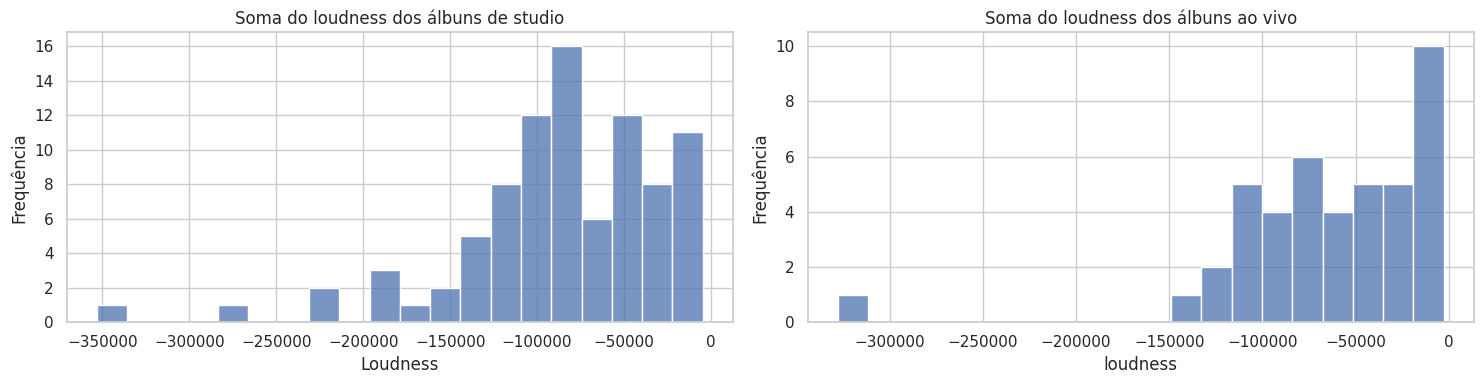

In [ ]:
df_studio = df_record_studio.groupby('album')['loudness'].sum()
df_live = df_record_live.groupby('album')['loudness'].sum()

fig, axes = plt.subplots(1, 2, figsize=(15, 4))
sns.histplot(data = df_studio, bins=20, ax=axes[0])
axes[0].set_title('Soma do loudness dos álbuns de studio')
axes[0].set_xlabel('Loudness')
axes[0].set_ylabel('Frequência')

sns.histplot(data = df_live, bins=20, ax=axes[1])
axes[1].set_title('Soma do loudness dos álbuns ao vivo')
axes[1].set_ylabel('Frequência')

fig.tight_layout()
plt.show()

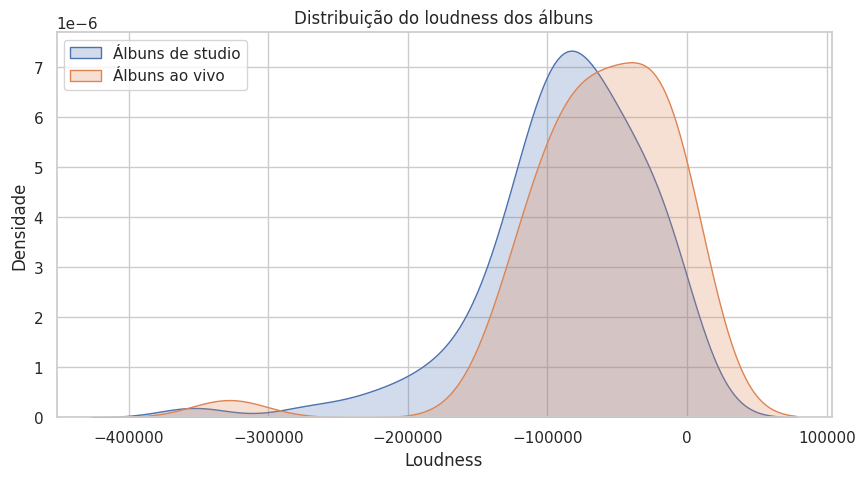

In [ ]:
plt.figure(figsize=(10,5))

sns.kdeplot(data = df_studio, label='Álbuns de studio', fill= True)
sns.kdeplot(data = df_live, label='Álbuns ao vivo', fill= True)

plt.title('Distribuição do loudness dos álbuns')
plt.xlabel('Loudness')
plt.ylabel('Densidade')
plt.legend()


Teste de hipótese:

In [ ]:
stat, p = shapiro(df_studio)
print('Soma do loudness dos álbuns de studio: ')
print('Estatística de teste {:.4f}, valor p: {}'.format(stat, p))

if p > 0.05:
  print('Não há evidência suficiente para rejeitar a hipótese de normalidade')
else:
  print('A hipótese de normalidade é rejeitada.')

Soma do loudness dos álbuns de studio: 
Estatística de teste 0.8958, valor p: 3.2961810837731026e-06
A hipótese de normalidade é rejeitada.


In [ ]:
stat, p = shapiro(df_live)
print('Soma do loudness dos álbuns ao vivo: ')
print('Estatística de teste {:.4f}, valor p: {}'.format(stat, p))

if p > 0.05:
  print('Não há evidência suficiente para rejeitar a hipótese de normalidade')
else:
  print('A hipótese de normalidade é rejeitada.')

Soma do loudness dos álbuns ao vivo: 
Estatística de teste 0.7913, valor p: 2.3506009149709294e-06
A hipótese de normalidade é rejeitada.


In [ ]:
stat, p = mannwhitneyu(df_studio.sample(len(df_studio)), df_live.sample(len(df_live)), alternative = 'less')

print('Estatística de teste U: ', stat)
print('Valor de p: ', p)

alpha = 0.05
if p < alpha:
  print('Diferença estatísticamente significante.')
else:
  print('Não há diferença estatísticamente significante.')

Estatística de teste U:  1367.0
Valor de p:  0.0050727361177996585
Diferença estatísticamente significante.


In [ ]:
df_valence = df.groupby('album')['valence'].mean().reset_index()

df_valence = df_valence.rename(columns={'valence' : 'valence_mean'})
df_valence['Sentimento'] = ['Positivo' if v > 0.6 else 'Negativo' for v in df_valence['valence_mean']]

df_valence.groupby('Sentimento')['Sentimento'].count()

,Sentimento
Sentimento,
Negativo,38
Positivo,52


In [ ]:
df_final_result = pd.merge(df, df_valence, on = 'album')
df_final_result.head(5)

,name,album,release_date,track_number,acousticness,danceability,energy,instrumentalness,liveness,loudness,speechiness,tempo,valence,popularity,duration_ms,duration_min,live_music_classification,valence_mean,Sentimento
0,Concert Intro Music - Live,Licked Live In NYC,2022-06-10,1,0.0824,0.463,0.993,0.996000,0.932,-12913.0,0.1100,118001.0,0.0302,33,48640,0.810667,True,0.27117,Negativo
1,Street Fighting Man - Live,Licked Live In NYC,2022-06-10,2,0.4370,0.326,0.965,0.233000,0.961,-4803.0,0.0759,131455.0,0.3180,34,253173,4.219550,True,0.27117,Negativo
2,Start Me Up - Live,Licked Live In NYC,2022-06-10,3,0.4160,0.386,0.969,0.400000,0.956,-4936.0,0.1150,130066.0,0.3130,34,263160,4.386000,True,0.27117,Negativo
3,If You Can't Rock Me - Live,Licked Live In NYC,2022-06-10,4,0.5670,0.369,0.985,0.000107,0.895,-5535.0,0.1930,132994.0,0.1470,32,305880,5.098000,True,0.27117,Negativo
4,Don’t Stop - Live,Licked Live In NYC,2022-06-10,5,0.4000,0.303,0.969,0.055900,0.966,-5098.0,0.0930,130533.0,0.2060,32,305106,5.085100,True,0.27117,Negativo


In [ ]:
matriz_correlacao = df_final_result.select_dtypes(include=['number']).corr()

correlacao_sentimento = matriz_correlacao['valence_mean']

display(correlacao_sentimento)

,valence_mean
track_number,-0.115007
acousticness,0.015491
danceability,0.492945
energy,-0.347447
instrumentalness,0.133741
liveness,-0.571749
loudness,-0.229543
speechiness,-0.416005
tempo,-0.028887
valence,0.603258


Matriz de correlação, verificação da relação entre as outras colunas a média valence dos albuns, onde classificamos se ela é positivo ou negativo:

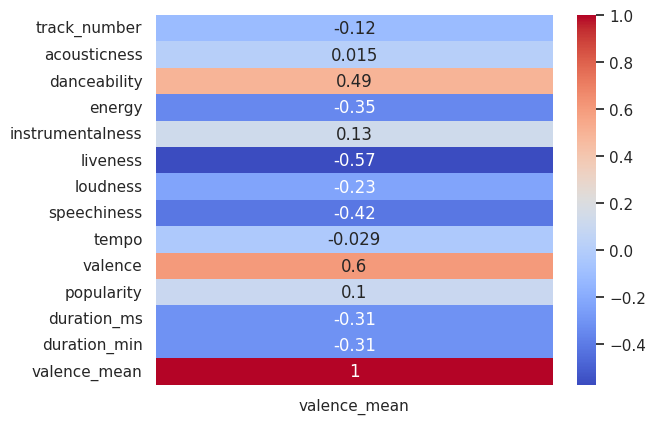

In [ ]:
sns.heatmap(correlacao_sentimento.to_frame(), annot=True, cmap='coolwarm')
plt.show()

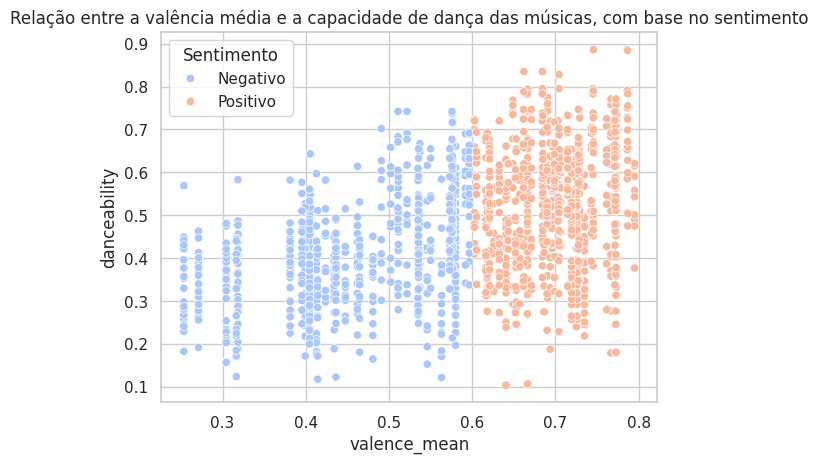

In [ ]:
sns.scatterplot(x='valence_mean', y='danceability', hue='Sentimento', data=df_final_result, palette='coolwarm')
plt.xlabel('valence_mean')
plt.ylabel('danceability')
plt.title('Relação entre a valência média e a capacidade de dança das músicas, com base no sentimento')
plt.show()

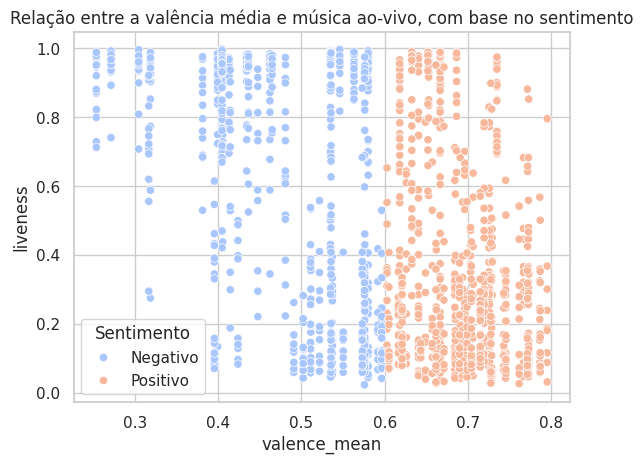

In [ ]:
#Vamos agora verificar uma coluna que não está fortemente correlacionada
sns.scatterplot(x='valence_mean', y='liveness', hue='Sentimento', data=df_final_result, palette='coolwarm')
plt.xlabel('valence_mean')
plt.ylabel('liveness')
plt.title('Relação entre a valência média e música ao-vivo, com base no sentimento')
plt.show()